## zad_18_2

Pierwszym krokiem będzie zaimplementowanie sieci neuronowej na używanym wcześniej zestawie Fashion-Mnist tak, aby uzyskać wynik na danych testowych rzędu accuracy > 0.94 (albo jak najbardziej zbliżony), używając poniższego podziału:

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)
    
Drugim krokiem będzie zapisanie i dostarczenie modelu oraz napisanie interfejsu, który przyjmuje wartość wejściową oraz zwraca wartość przewidzianą przez nasz model wraz z wyrysowanym obrazem wejściowym (aby można było zweryfikować wizualnie, czy działa).

W kursie nie mówiliśmy jak tego dokonać, choć zapisywanie modeli jest opisane na stronie TensorFlow. Mentorzy z chęcią pomogą, lecz zachęcamy do odkrycia, jak to zrobić samemu.

Trzecim krokiem będzie podbicie naszego wyniku do około 0.97 poprzez użycie technik augumentacji, czyli tworzenia nowy danych na bazie danych już istniejących. Jest to przydatna technika, o którą pytanie pojawia się podczas rozmów o pracę :)

Będzie to relatywnie trudne, gdyż posiadamy mało danych treningowych, więc należy zrobić mały "research" w poszukiwaniu informacji, jak takie dane sobie wygenerować.

Polecamy szczególnie:

Albumentation library
Open CV library
Ten kurs ma pokazywać, jak w rzeczywistości pracuje się z TensorFlow, a realia są takie, że bardzo często większość pracy to odkrywanie nowych rzeczy. Dlatego podajemy tylko linki do bibliotek – jak należy ich użyć, trzeba wywnioskować samemu :)

### import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.config.run_functions_eagerly(True)
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import albumentations as A
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


Pierwszym krokiem będzie zaimplementowanie sieci neuronowej na używanym wcześniej zestawie Fashion-Mnist tak, aby uzyskać wynik na danych testowych rzędu accuracy > 0.94 (albo jak najbardziej zbliżony), używając poniższego podziału:

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [2]:
# wczytanie danych
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# wydobycie obrazow oraz etykiet
images, labels = train

In [4]:
# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

In [5]:
# zapisujemy dane jako int
labels = labels.astype(np.int32)

In [6]:

# podzial na częsci treningowa i testowa
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [7]:
# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(5000).batch(32)

#### tworzenie modelu

In [10]:
# Budowa modelu CNN

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))









In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,017,770 (49.66 MB)

 Trainable params: 13,016,106 (49.65 MB)

 Non-trainable params: 1,664 (6.50 KB)

#### kompilacja modelu

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### szkolenie

In [13]:
# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=12, batch_size=64,
                    validation_split=0.1, verbose=2)

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/12
760/760 - 576s - 758ms/step - accuracy: 0.8209 - loss: 0.5215 - val_accuracy: 0.8737 - val_loss: 0.3600
Epoch 2/12
760/760 - 585s - 770ms/step - accuracy: 0.8858 - loss: 0.3285 - val_accuracy: 0.9250 - val_loss: 0.2155
Epoch 3/12
760/760 - 596s - 784ms/step - accuracy: 0.9040 - loss: 0.2710 - val_accuracy: 0.9091 - val_loss: 0.2404
Epoch 4/12
760/760 - 595s - 783ms/step - accuracy: 0.9125 - loss: 0.2484 - val_accuracy: 0.9143 - val_loss: 0.2401
Epoch 5/12
760/760 - 585s - 770ms/step - accuracy: 0.9188 - loss: 0.2280 - val_accuracy: 0.9326 - val_loss: 0.1864
Epoch 6/12
760/760 - 566s - 745ms/step - accuracy: 0.9266 - loss: 0.2072 - val_accuracy: 0.9287 - val_loss: 0.1956
Epoch 7/12
760/760 - 612s - 805ms/step - accuracy: 0.9323 - loss: 0.1896 - val_accuracy: 0.9420 - val_loss: 0.1672
Epoch 8/12
760/760 - 557s - 733ms/step - accuracy: 0.9346 - loss: 0.1825 - val_accuracy: 0.9441 - val_loss: 0.1561
Epoch 9/12
760/760 - 559s - 736ms/step - accuracy: 0.9413 - loss: 0.1623 - val_a

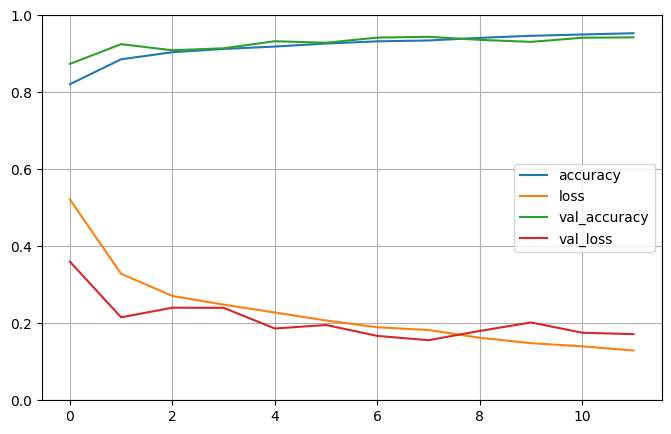

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### predykcja

In [15]:
y_pred = model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step
probs :  [1.2329384e-09 1.9555313e-07 6.8694885e-09 4.5923287e-09 1.7722779e-09
 2.7153801e-05 2.0434150e-09 9.9995875e-01 1.2307020e-08 1.3841466e-05]
klasa : 7
rzeczywista klasa:  7


#### accurancy na zbiorze testowym

In [16]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy na zbiorze testowym: {acc:.4f}")
print(f"Straty na zbiorze testowym: {loss:.4f}")

Accuracy na zbiorze testowym: 0.9323
Straty na zbiorze testowym: 0.1950


Drugim krokiem będzie zapisanie i dostarczenie modelu oraz napisanie interfejsu, który przyjmuje wartość wejściową oraz zwraca wartość przewidzianą przez nasz model wraz z wyrysowanym obrazem wejściowym (aby można było zweryfikować wizualnie, czy działa).

W kursie nie mówiliśmy jak tego dokonać, choć zapisywanie modeli jest opisane na stronie TensorFlow. Mentorzy z chęcią pomogą, lecz zachęcamy do odkrycia, jak to zrobić samemu.

In [18]:
# zapisanie wytrenowanego modelu
model.save("fashion_mnist_model.h5")

# wczytanie modelu w innym miejscu
from tensorflow.keras.models import load_model
loaded_model = load_model("fashion_mnist_model.h5")

In [19]:
# Wczytaj model
model = load_model("fashion_mnist_model.h5")

# Nazwy klas w Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def predict_and_show(image, model=model):
    """
    image: pojedynczy obrazek 28x28 (numpy array)
    model: załadowany model Keras
    """
    # upewnij się, że ma odpowiedni kształt i zakres [0,1]
    img = image.reshape(1, 28, 28).astype("float32") / 255.0

    # predykcja
    preds = model.predict(img)
    predicted_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)

    # pokazanie obrazka
    plt.imshow(image, cmap="gray")
    plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


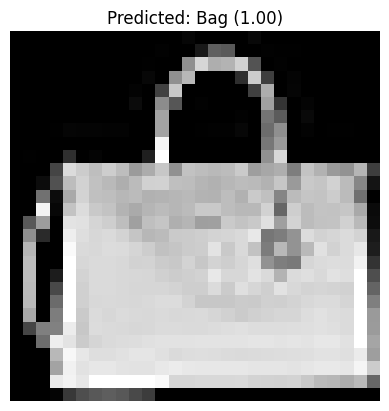

Prawdziwa klasa: Bag


In [20]:
# test interfejsu

# Załaduj dane Fashion-MNIST
(_, _), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Przykład: weź pierwszy obrazek ze zbioru testowego
pred_class, conf = predict_and_show(X_test[30], model)
print(f"Prawdziwa klasa: {class_names[y_test[30]]}")

Trzecim krokiem będzie podbicie naszego wyniku do około 0.97 poprzez użycie technik augumentacji, czyli tworzenia nowy danych na bazie danych już istniejących. Jest to przydatna technika, o którą pytanie pojawia się podczas rozmów o pracę :)

Będzie to relatywnie trudne, gdyż posiadamy mało danych treningowych, więc należy zrobić mały "research" w poszukiwaniu informacji, jak takie dane sobie wygenerować.

Polecamy szczególnie:

Albumentation library
Open CV library

#### albumentations

In [21]:
# Definicja transformacji
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    #rotation_range=15,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #zoom_range=0.1,
    horizontal_flip=True
)




In [24]:
# Dodanie wymiaru kanału
X_train_aug = X_train.reshape(-1, 28, 28, 1)
X_test_aug = X_test.reshape(-1, 28, 28, 1)

In [25]:

# Teraz można wywołać fit()
datagen.fit(X_train_aug)

In [27]:


# Budowa modelu CNN

model_aug = Sequential()
model_aug.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last', input_shape=(28,28,1)))
model_aug.add(BatchNormalization())

model_aug.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model_aug.add(BatchNormalization())
model_aug.add(Dropout(0.25))

model_aug.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.25))


model_aug.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model_aug.add(BatchNormalization())
model.add(Dropout(0.25))

model_aug.add(Flatten())
model_aug.add(Dense(512, activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(Dropout(0.5))
model_aug.add(Dense(128, activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(Dropout(0.5))
model_aug.add(Dense(10, activation='softmax'))



In [29]:
# kompilacja
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# trenowanie modelu

#aug_model = model  # możesz też stworzyć nowy model
history_aug = model_aug.fit(
    datagen.flow(X_train_aug, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_test_aug, y_test),
    verbose=2
)


Epoch 1/10
844/844 - 619s - 733ms/step - accuracy: 0.8225 - loss: 0.5096 - val_accuracy: 0.2852 - val_loss: 856.0127
Epoch 2/10
844/844 - 618s - 732ms/step - accuracy: 0.8872 - loss: 0.3249 - val_accuracy: 0.3508 - val_loss: 265.4170
Epoch 3/10
844/844 - 621s - 736ms/step - accuracy: 0.9022 - loss: 0.2794 - val_accuracy: 0.3119 - val_loss: 309.2521
Epoch 4/10
844/844 - 686s - 813ms/step - accuracy: 0.9104 - loss: 0.2532 - val_accuracy: 0.2137 - val_loss: 922.9216
Epoch 5/10
844/844 - 645s - 764ms/step - accuracy: 0.9184 - loss: 0.2301 - val_accuracy: 0.3120 - val_loss: 1100.3730
Epoch 6/10
844/844 - 634s - 751ms/step - accuracy: 0.9242 - loss: 0.2141 - val_accuracy: 0.3398 - val_loss: 628.2769
Epoch 7/10
844/844 - 627s - 743ms/step - accuracy: 0.9294 - loss: 0.1973 - val_accuracy: 0.3890 - val_loss: 379.4464
Epoch 8/10
844/844 - 615s - 729ms/step - accuracy: 0.9333 - loss: 0.1850 - val_accuracy: 0.6813 - val_loss: 53.0671
Epoch 9/10
844/844 - 634s - 752ms/step - accuracy: 0.9366 - loss

<function matplotlib.pyplot.show(close=None, block=None)>

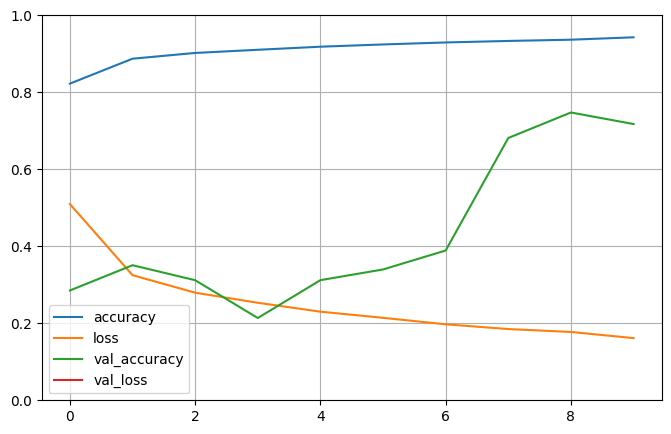

In [32]:
pd.DataFrame(history_aug.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [33]:
# predykcja
y_pred = model_aug.predict(X_test)
print("probs : ", y_pred[6105])
print("klasa :", np.argmax(y_pred[6105]))
print("rzeczywista klasa: ", y_test[6105])

c:\Users\monas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step
probs :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
klasa : 3
rzeczywista klasa:  3


In [34]:
loss, acc = model_aug.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy na zbiorze testowym: {acc:.4f}")
print(f"Straty na zbiorze testowym: {loss:.4f}")

Accuracy na zbiorze testowym: 0.7175
Straty na zbiorze testowym: 32.1893


##### niestety model z uzyciem albumentation, dał gorszy wnynik niż model w którym nie użyłem albumentation .......
##### 72% (z albumentation) vs 93%  na zbiorze testowym